In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [2]:
def box_muller(n):
    U1 = np.random.uniform(size = n)
    U2 = np.random.uniform(size = n)

    # 0. Initialize random number generator
    rng = np.random.RandomState(seed=42)
    from math import pi
    # 1. Generate 1000 U1 and U2, which are Unif(0, 1)
    u1s, u2s = rng.uniform(size=n), rng.uniform(size=n)

    # 2. Tranform U1 to s
    ss = -np.log(u1s)

    # 3. Transform U2 to theta
    thetas = 2*pi*u2s

    # 4. Convert s to r
    rs = np.sqrt(2*ss)

    # 5. Calculate x and y from r and theta
    xs, ys = rs*np.cos(thetas), rs*np.sin(thetas)
    
    return thetas, rs, xs, ys

In [3]:
def scatter_plot(x,y, c= "2d scatterplot"):
    plt.scatter(x,y,alpha=0.2)
    plt.title(c)
    plt.xlabel("Random X")
    plt.ylabel("Random Y")
    plt.show()

In [4]:
def histogram_2D(x,y,bins = 10,c = "2d histogram"):
    h = plt.hist2d(x,y,bins)
    plt.title(c)
    plt.colorbar(h[3])
    plt.show()

In [5]:
def polar_histogram(thetas, rs):
    # Fixing random state for reproducibility
    np.random.seed(19680801)
    N = 100
    bottom = 0
    max_height = 4

    width = (2*np.pi) / N

    ax = plt.subplot(111, polar=True)
    #ax.set_title("1-D Polar Histogram")
    plt.title("1-D Polar Histogram \n", fontsize = 15)
    bars = ax.bar(thetas, rs, width=width, bottom=bottom)
    # Use custom colors and opacity
    for r, bar in zip(rs, bars):
        bar.set_facecolor(plt.cm.jet(r / 10.))
        bar.set_alpha(0.8)
    plt.show()

In [6]:
# Creates the two guassians of size 10000
thetas, rs, xs, ys = box_muller(1000)

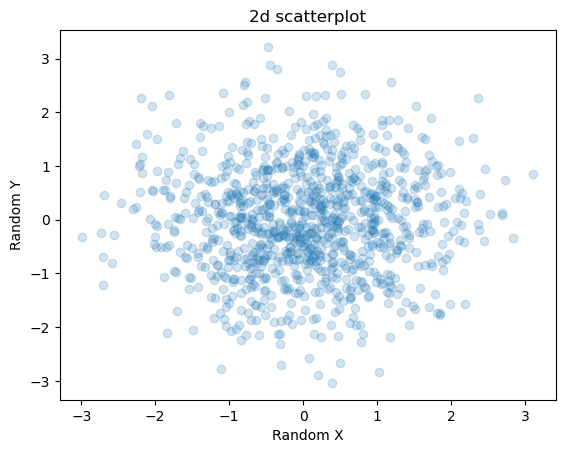

In [7]:
scatter_plot(xs, ys) 

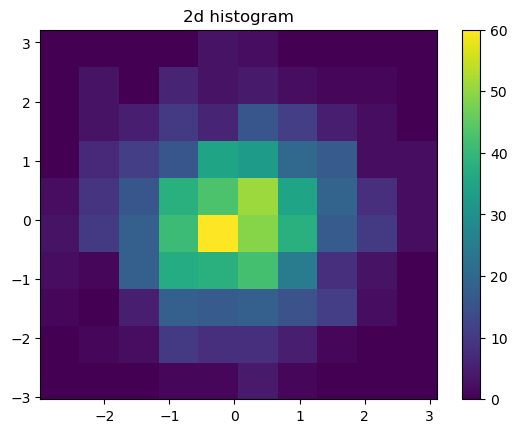

In [8]:
histogram_2D(xs, ys) # 10 bins is default

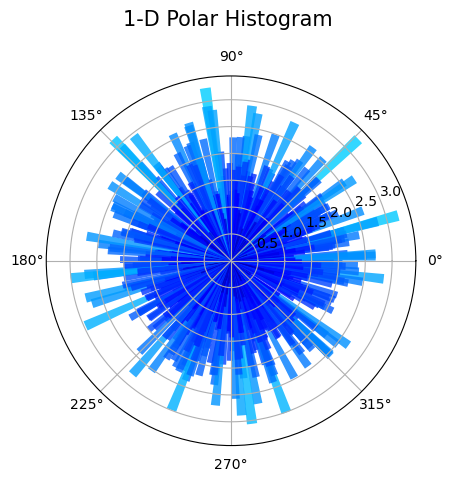

In [9]:
polar_histogram(thetas, rs)

# Gives weird plot 
X, Y = np.meshgrid(xs, ys)


Z = np.sin(X)*np.cos(Y)


fig, ax = plt.subplots(figsize=(6,6))


ax.set_aspect('equal')
cf = ax.contourf(X,Y,Z)
fig.colorbar(cf, ax=ax)


plt.show()



In [10]:
xlist = xs
ylist = ys
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X**2 + Y**2)

fig, ax = plt.subplots(1, 1) 
  
z = np.cos(X / 2) + np.sin(Y / 4) 
  
# plots contour lines 
ax.contour(X, Y, z) 
  
ax.set_title('Contour Plot') 
ax.set_xlabel('feature_x') 
ax.set_ylabel('feature_y') 
  
plt.show() 

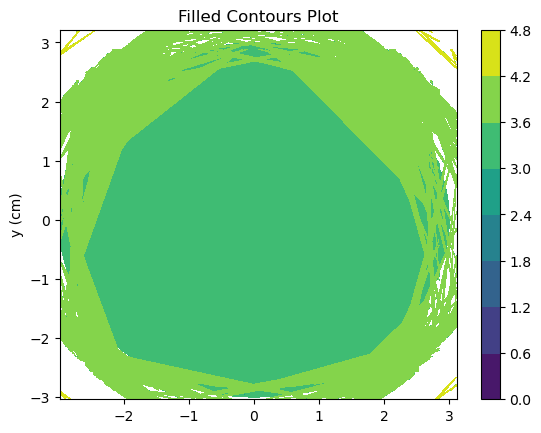

In [23]:
mpl.rcParams.update(mpl.rcParamsDefault)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
#ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np

def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = xs
y = ys

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

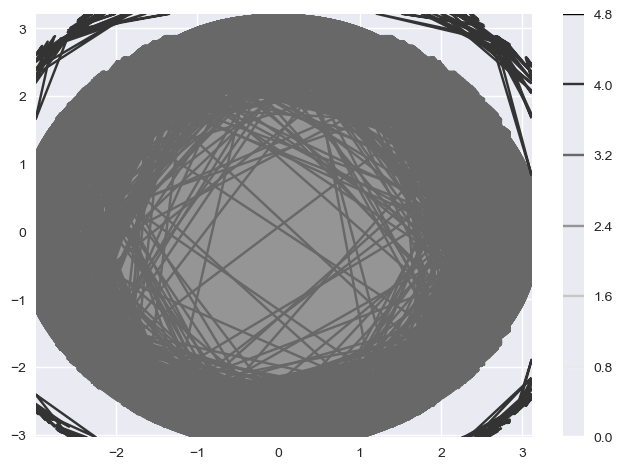

In [22]:
plt.contour(X, Y, Z,5)
plt.colorbar()
plt.show()

In [26]:
plt.contour(X, Y, Z, 20, cmap='RdGy')

Source: 
- Contours
    - https://plotly.com/python/contour-plots/
    - https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html

In [27]:
# From : https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

In [29]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
# ax.clabel(CS, inline=True, fontsize=10)
# ax.set_title('Simplest default with labels')

In [ ]:
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simplest default with labels')


In [ ]:
# Idk why this one is taking forever